In [7]:
import pandas as pd 
import json 
import numpy as np 
import csv 
import matplotlib.pyplot as plt

## Question 4: How much defensive stats correlate to a winning record? 
# Is there a difference in which  steals, blocks, rebounds effect the success of a team between college and professional basketball?


In [8]:
# NBA Data 

#Load in Season Standings 
Season1314_Standings_Load = "NBA data (standings)/13-14 NBA standings.csv"
Season1415_Standings_Load = "NBA data (standings)/14-15 NBA standings.csv"
Season1516_Standings_Load = "NBA data (standings)/15-16 NBA standings.csv"
Season1617_Standings_Load = "NBA data (standings)/16-17 NBA standings.csv"
Season1718_Standings_Load = "NBA data (standings)/17-18 NBA standings.csv"

#Load in Player Stats Data 
Season1314_Player_Load = "NBA data per game (player)/13-14 nba data.csv"
Season1415_Player_Load = "NBA data per game (player)/14-15 nba data.csv"
Season1516_Player_Load = "NBA data per game (player)/15-16 nba data.csv"
Season1617_Player_Load = "NBA data per game (player)/16-17 nba data.csv"
Season1718_Player_Load = "NBA data per game (player)/17-18 nba data.csv"

#Load in Team Stats Data 
Season1314_Stats_Load = "NBA data per game (team)/13-14 NBA team per.csv"
Season1415_Stats_Load = "NBA data per game (team)/14-15 NBA team per.csv"
Season1516_Stats_Load = "NBA data per game (team)/15-16 NBA team per.csv"
Season1617_Stats_Load = "NBA data per game (team)/16-17 NBA team per.csv"
Season1718_Stats_Load = "NBA data per game (team)/17-18 NBA team per.csv"


Load in Season Stats and Calculate Most Succesful Teams within Dataset 

In [9]:
#Read in NBA Data  

#Team Standings
NBA_Season_Standings_1314= pd.read_csv(Season1314_Standings_Load)
NBA_Season_Standings_1415= pd.read_csv(Season1415_Standings_Load)
NBA_Season_Standings_1516= pd.read_csv(Season1516_Standings_Load)
NBA_Season_Standings_1617= pd.read_csv(Season1617_Standings_Load)
NBA_Season_Standings_1718= pd.read_csv(Season1314_Standings_Load)

#Team Stats
NBA_Season_Stats_1314= pd.read_csv(Season1314_Stats_Load)
NBA_Season_Stats_1415= pd.read_csv(Season1415_Stats_Load)
NBA_Season_Stats_1516= pd.read_csv(Season1516_Stats_Load)
NBA_Season_Stats_1617= pd.read_csv(Season1617_Stats_Load)
NBA_Season_Stats_1718= pd.read_csv(Season1718_Stats_Load)


In [10]:
# Merge Data Frames 

NBA_standings_1314_df = pd.DataFrame(NBA_Season_Standings_1314[['Team', 'W', 'L']])
NBA_standings_1314_df = NBA_standings_1314_df.sort_values(by='W', ascending=False)
NBA_Def_combined_1314 = NBA_standings_1314_df.merge(NBA_Season_Stats_1314, on='Team')

NBA_standings_1415_df = pd.DataFrame(NBA_Season_Standings_1415[['Team', 'W', 'L']])
NBA_standings_1415_df = NBA_standings_1415_df.sort_values(by='W', ascending=False)
NBA_Def_combined_1415 = NBA_standings_1415_df.merge(NBA_Season_Stats_1415, on='Team')

NBA_standings_1516_df = pd.DataFrame(NBA_Season_Standings_1516[['Team', 'W', 'L']])
NBA_standings_1516_df = NBA_standings_1516_df.sort_values(by='W', ascending=False)
NBA_Def_combined_1516 = NBA_standings_1516_df.merge(NBA_Season_Stats_1516, on='Team')

NBA_standings_1617_df = pd.DataFrame(NBA_Season_Standings_1617[['Team', 'W', 'L']])
NBA_standings_1617_df = NBA_standings_1617_df.sort_values(by='W', ascending=False)
NBA_Def_combined_1617 = NBA_standings_1617_df.merge(NBA_Season_Stats_1617, on='Team') 

NBA_standings_1718_df = pd.DataFrame(NBA_Season_Standings_1718[['Team', 'W', 'L']])
NBA_standings_1718_df = NBA_standings_1718_df.sort_values(by='W', ascending=False)
NBA_Def_combined_1718 = NBA_standings_1718_df.merge(NBA_Season_Stats_1516, on='Team')




Data Frames for the top 5 Teams in Each NBA Season based on Wins

In [11]:
#Drop Data Outside of top 5 Teams

NBA_top5_1314= NBA_Def_combined_1314.drop(NBA_Def_combined_1314.index[5:])
NBA_top5_1415= NBA_Def_combined_1415.drop(NBA_Def_combined_1415.index[5:])
NBA_top5_1516= NBA_Def_combined_1516.drop(NBA_Def_combined_1516.index[5:])
NBA_top5_1617= NBA_Def_combined_1617.drop(NBA_Def_combined_1617.index[5:])
NBA_top5_1718= NBA_Def_combined_1718.drop(NBA_Def_combined_1718.index[5:])


In [12]:
NBA_top5_1314

,Team,W,L,Rk,G,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,Tot_DRB,Tot_STL,Tot_BLK
0,San Antonio Spurs*,62.0,20.0,6.0,82,240.9,40.6,83.5,0.486,8.5,...,43.3,25.2,7.4,5.1,14.4,18.2,105.4,2788,607,418
1,Oklahoma City Thunder*,59.0,23.0,5.0,82,241.5,39.0,82.7,0.471,8.1,...,44.7,21.9,8.3,6.1,15.3,22.7,106.2,2780,681,500
2,Los Angeles Clippers*,57.0,25.0,1.0,82,240.9,39.1,82.5,0.474,8.5,...,43.0,24.6,8.6,4.8,13.9,21.5,107.9,2665,705,394
3,Indiana Pacers*,56.0,26.0,24.0,82,241.2,36.0,80.2,0.449,6.7,...,44.7,20.1,6.7,5.4,15.1,20.4,96.7,2829,549,443
4,Houston Rockets*,54.0,28.0,2.0,82,241.8,38.0,80.5,0.472,9.5,...,45.3,21.4,7.6,5.6,16.1,20.4,107.7,2796,623,459


Data Frames for the Bottom 5 Teams in Each NBA Season based on Wins

In [13]:
# Drop Data outside of bottom 5 teams 
NBA_bot5_1314= NBA_Def_combined_1314.drop(NBA_Def_combined_1314.index[:-6])
NBA_bot5_1415= NBA_Def_combined_1415.drop(NBA_Def_combined_1415.index[:-6])
NBA_bot5_1516= NBA_Def_combined_1516.drop(NBA_Def_combined_1516.index[:-6])
NBA_bot5_1617= NBA_Def_combined_1617.drop(NBA_Def_combined_1617.index[:-6])
NBA_bot5_1718= NBA_Def_combined_1718.drop(NBA_Def_combined_1718.index[:-6])



In [14]:
NBA_bot5_1718

,Team,W,L,Rk,G,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,Tot_DRB,Tot_STL,Tot_BLK
18,Los Angeles Lakers,27.0,55.0,30.0,82,240.6,35.1,84.8,0.414,7.8,...,43.0,18.0,7.2,4.1,13.7,20.3,97.3,2649,590,336
19,Utah Jazz,25.0,57.0,28.0,82,243.4,36.1,80.4,0.449,8.5,...,43.2,19.0,7.7,5.2,14.9,20.2,97.7,2665,631,426
20,Orlando Magic,23.0,59.0,18.0,82,242.7,39.5,86.8,0.455,7.8,...,43.3,23.6,8.2,5.1,14.1,20.7,102.1,2706,672,418
21,Philadelphia 76ers,19.0,63.0,29.0,82,241.5,36.2,84.0,0.431,9.3,...,41.2,21.5,8.3,6.0,16.4,21.7,97.4,2608,681,492
22,Milwaukee Bucks,15.0,67.0,25.0,82,241.8,38.4,82.2,0.467,5.4,...,41.7,23.1,8.2,5.8,15.2,20.7,99.0,2558,672,476
23,League Average,NaN,NaN,NaN,82,241.8,38.2,84.6,0.452,8.5,...,43.8,22.3,7.8,5.0,14.4,20.3,102.7,2731,640,410


In [15]:
# Create New Data Frame for Top 5 teams with only Team Name, Rk, Wins, Def Reb, Steals, Blocks
#13-14 Season
NBA_Def_top_1314 = pd.DataFrame(NBA_top5_1314[['Team', 'Rk', 'W','DRB','STL','BLK']])

#14-15 Season 
NBA_Def_top_1415 = pd.DataFrame(NBA_top5_1415[['Team', 'Rk', 'W','DRB','STL','BLK']])

#15-16 Season 
NBA_Def_top_1516 = pd.DataFrame(NBA_top5_1516[['Team', 'Rk', 'W','DRB','STL','BLK']])

#16-17 Season 
NBA_Def_top_1617 = pd.DataFrame(NBA_top5_1617[['Team', 'Rk', 'W','DRB','STL','BLK']])

#17-18 Season 
NBA_Def_top_1718 = pd.DataFrame(NBA_top5_1718[['Team', 'Rk', 'W','DRB','STL','BLK']])


In [16]:
#Reapeat the process for the bottom 5 tams of every season 
#13-14 Season
NBA_Def_bot_1314 = pd.DataFrame(NBA_bot5_1314[['Team', 'Rk', 'W','DRB','STL','BLK']])

#14-15 Season 
NBA_Def_bot_1415 = pd.DataFrame(NBA_bot5_1415[['Team', 'Rk', 'W','DRB','STL','BLK']])

#15-16 Season 
NBA_Def_bot_1516 = pd.DataFrame(NBA_bot5_1516[['Team', 'Rk', 'W','DRB','STL','BLK']])

#16-17 Season 
NBA_Def_bot_1617 = pd.DataFrame(NBA_bot5_1617[['Team', 'Rk', 'W','DRB','STL','BLK']])

#17-18 Season 
NBA_Def_bot_1718 = pd.DataFrame(NBA_bot5_1718[['Team', 'Rk', 'W','DRB','STL','BLK']])



NCAA Data

In [17]:
# Load NCAA Data  
NCAA_1314_Stats_Load = "NCAA Data/ncaa data 13-14.csv"
NCAA_1415_Stats_Load = "NCAA Data/ncaa data 14-15.csv"
NCAA_1516_Stats_Load = "NCAA Data/ncaa data 15-16.csv"
NCAA_1617_Stats_Load = "NCAA Data/ncaa data 16-17.csv"
NCAA_1718_Stats_Load = "NCAA Data/ncaa data 17-18.csv"

#read in NCAA datasets 
NCAA_1314_Stats=pd.read_csv(NCAA_1314_Stats_Load)
NCAA_1415_Stats=pd.read_csv(NCAA_1415_Stats_Load)
NCAA_1516_Stats=pd.read_csv(NCAA_1516_Stats_Load)
NCAA_1617_Stats=pd.read_csv(NCAA_1617_Stats_Load)
NCAA_1718_Stats=pd.read_csv(NCAA_1718_Stats_Load)



In [18]:
NCAA_1314_Stats.head()

,Rk,School,G,W,L,W-L%,SRS,SOS,Tm.,Opp.,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,DRB
0,1,Wichita State,36,35,1,0.972,16.65,1.74,2706,2141,...,916,0.725,419,1381,491,247,184,374,611,962
1,2,Florida,39,36,3,0.923,20.69,8.54,2727,2253,...,871,0.668,437,1385,509,274,118,418,611,948
2,3,Stephen F. Austin,35,32,3,0.914,4.82,-6.76,2661,2219,...,800,0.711,451,1186,574,257,104,393,730,735
3,4,Arizona,38,33,5,0.868,23.36,9.04,2769,2225,...,870,0.659,465,1449,574,223,173,387,630,984
4,5,San Diego State,36,31,5,0.861,14.95,4.86,2530,2052,...,902,0.663,470,1364,356,274,183,355,600,894


In [21]:
#filter out only defensive stats and wins/losses
NCAA_1314_df = pd.DataFrame(NCAA_1314_Stats[['School', 'Rk', 'W','STL','BLK','DRB']])
NCAA_1415_df = pd.DataFrame(NCAA_1415_Stats[['School', 'Rk', 'W','STL','BLK','DRB']])
NCAA_1516_df = pd.DataFrame(NCAA_1516_Stats[['School', 'Rk', 'W','STL','BLK','DRB']])
NCAA_1617_df = pd.DataFrame(NCAA_1617_Stats[['School', 'Rk', 'W','STL','BLK','DRB']])
NCAA_1718_df = pd.DataFrame(NCAA_1718_Stats[['School', 'Rk', 'W','STL','BLK','DRB']])



In [22]:
#Drop Teams Outisde of Top 5 
NCAA_top5_1314= NCAA_1314_df.drop(NCAA_1314_df.index[5:])
NCAA_top5_1415= NCAA_1415_df.drop(NCAA_1415_df.index[5:])
NCAA_top5_1516= NCAA_1516_df.drop(NCAA_1516_df.index[5:])
NCAA_top5_1617= NCAA_1617_df.drop(NCAA_1617_df.index[5:])
NCAA_top5_1718= NCAA_1718_df.drop(NCAA_1718_df.index[5:])




In [23]:
#Drop Teams Outisde of Top 5 
NCAA_bot5_1314= NCAA_1314_df.drop(NCAA_1314_df.index[:-5])
NCAA_bot5_1415= NCAA_1415_df.drop(NCAA_1415_df.index[:-5])
NCAA_bot5_1516= NCAA_1516_df.drop(NCAA_1516_df.index[:-5])
NCAA_bot5_1617= NCAA_1617_df.drop(NCAA_1617_df.index[:-5])
NCAA_bot5_1718= NCAA_1718_df.drop(NCAA_1718_df.index[:-5])


# visualize data 

# NCAA 2013-14 


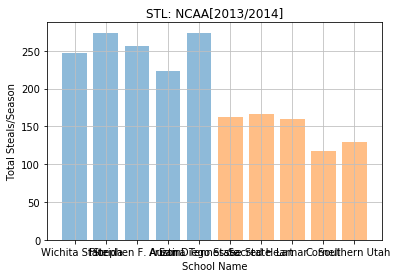

In [25]:
#Steals 
Top_NCAA_1314_STL_Bar = plt.bar(NCAA_top5_1314['School'],NCAA_top5_1314['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2013/2014]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NCAA_1314_STL_Bar = plt.bar(NCAA_bot5_1314['School'],NCAA_bot5_1314['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2013/2014]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NCAA_2013_STL.png')


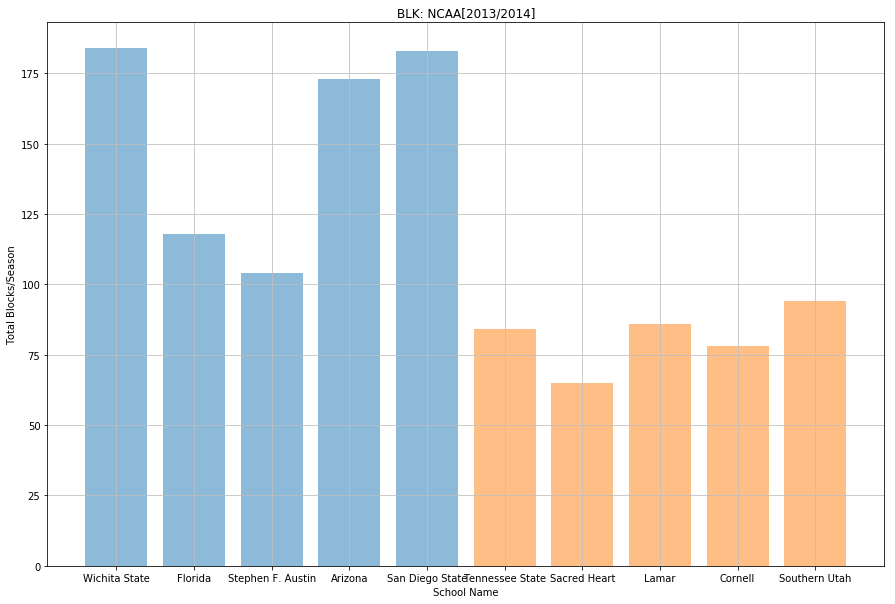

In [26]:

#Blocks 
Top_NCAA_1314_BLK_Bar = plt.bar(NCAA_top5_1314['School'],NCAA_top5_1314['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2013/2014]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1314_BLK_Bar = plt.bar(NCAA_bot5_1314['School'],NCAA_bot5_1314['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2013/2014]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


plt.savefig('NCAA_2013_BLK.png')




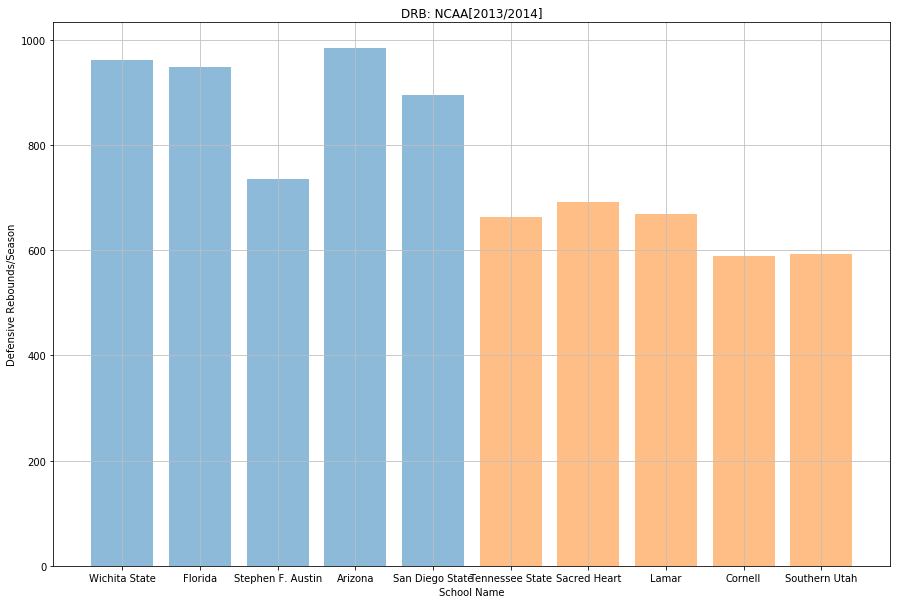

In [27]:
#Defensive Rebounds 
Top_NCAA_1314_DRB_Bar = plt.bar(NCAA_top5_1314['School'],NCAA_top5_1314['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2013/2014]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1314_DRB_Bar = plt.bar(NCAA_bot5_1314['School'],NCAA_bot5_1314['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2013/2014]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NCAA_2013_DRB.png')

# NCAA 2014-15


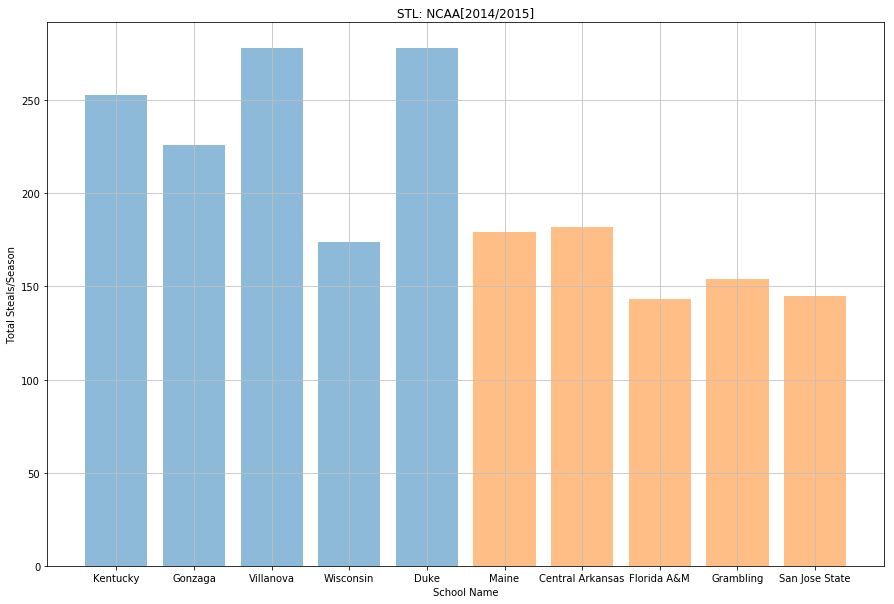

In [28]:
#Steals 
Top_NCAA_1415_STL_Bar = plt.bar(NCAA_top5_1415['School'],NCAA_top5_1415['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2014/2015]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)




Bot_NCAA_1415_STL_Bar = plt.bar(NCAA_bot5_1415['School'],NCAA_bot5_1415['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2014/2015]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


# Save the Figure
plt.savefig('NCAA_2014_STL.png')


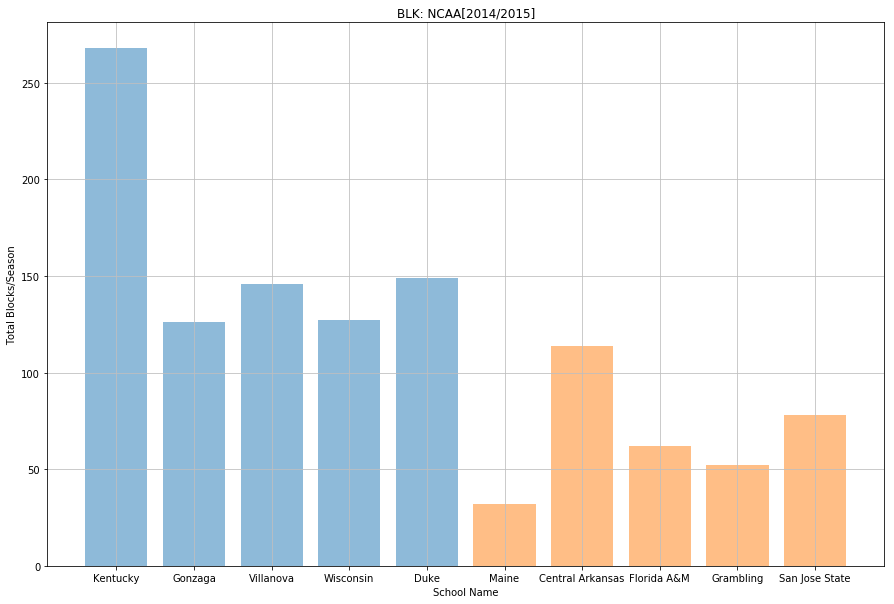

In [29]:
#Blocks 
Top_NCAA_1415_BLK_Bar = plt.bar(NCAA_top5_1415['School'],NCAA_top5_1415['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2014/2015]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1415_BLK_Bar = plt.bar(NCAA_bot5_1415['School'],NCAA_bot5_1415['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2014/2015]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


plt.savefig('NCAA_2014_BLK.png')

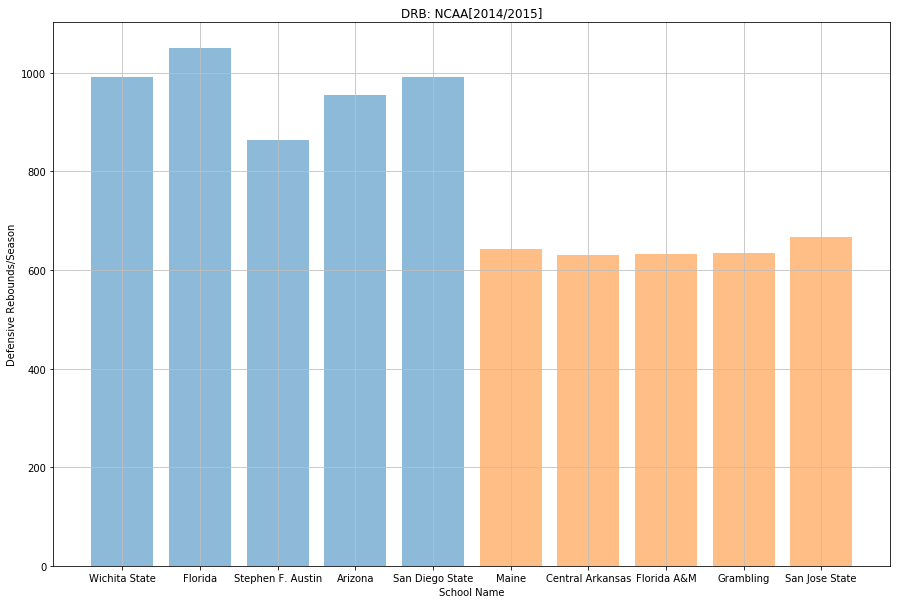

In [30]:
#Defensive Rebounds 
Top_NCAA_1415_DRB_Bar = plt.bar(NCAA_top5_1314['School'],NCAA_top5_1415['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2014/2015]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1415_DRB_Bar = plt.bar(NCAA_bot5_1415['School'],NCAA_bot5_1415['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2014/2015]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NCAA_2014_DRB.png')

# NCAA 2015-16

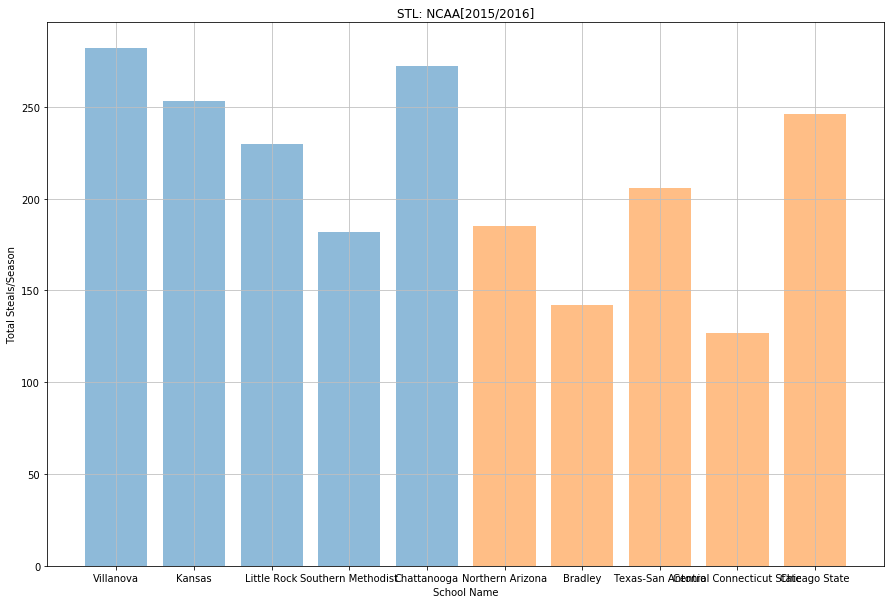

In [31]:
#Steals 
Top_NCAA_1516_STL_Bar = plt.bar(NCAA_top5_1516['School'],NCAA_top5_1516['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2015/2016]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)




Bot_NCAA_1516_STL_Bar = plt.bar(NCAA_bot5_1516['School'],NCAA_bot5_1516['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2015/2016]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


# Save the Figure
plt.savefig('NCAA_2015_STL.png')

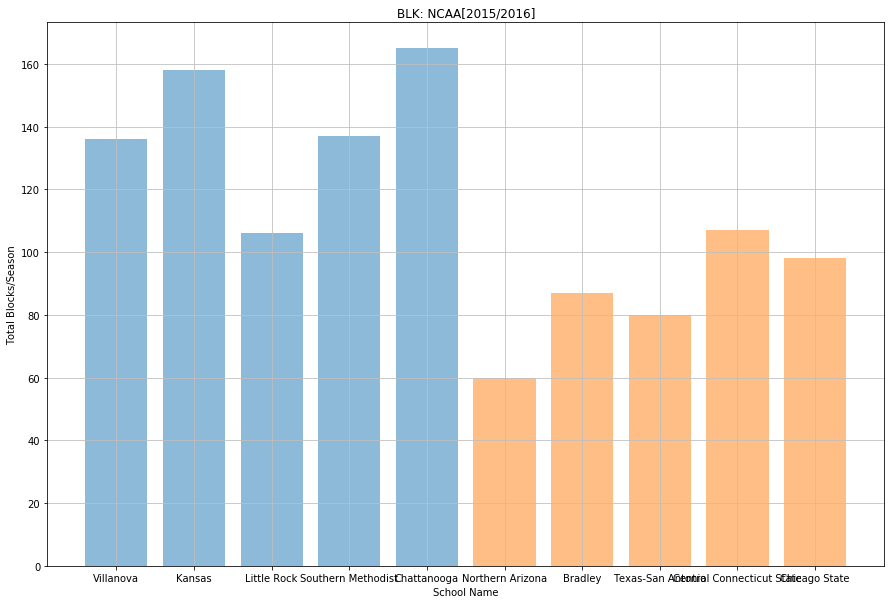

In [32]:
#Blocks 
Top_NCAA_1516_BLK_Bar = plt.bar(NCAA_top5_1516['School'],NCAA_top5_1516['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2015/2016]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1516_BLK_Bar = plt.bar(NCAA_bot5_1516['School'],NCAA_bot5_1516['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2015/2016]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


plt.savefig('NCAA_2015_BLK.png')

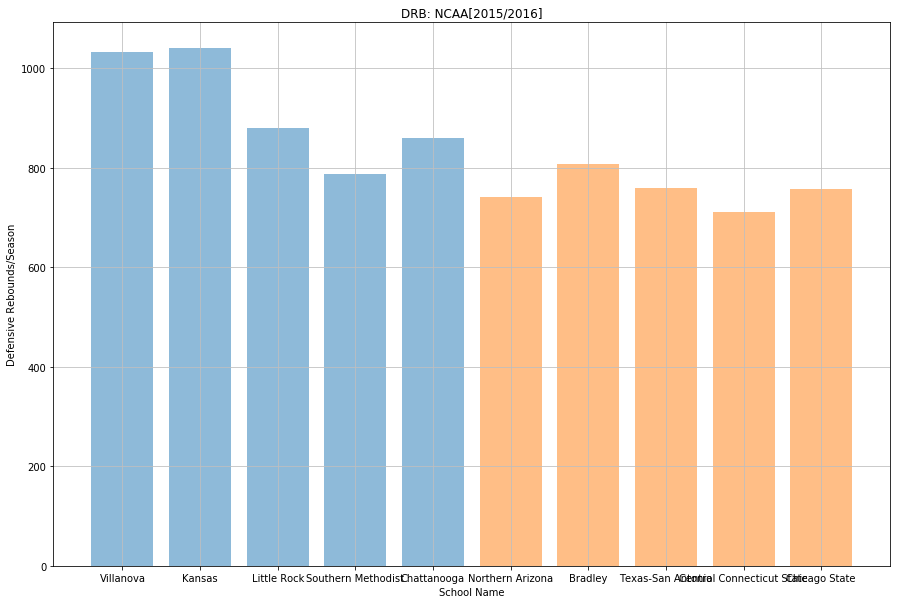

In [33]:
#Defensive Rebounds 
Top_NCAA_1516_DRB_Bar = plt.bar(NCAA_top5_1516['School'],NCAA_top5_1516['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2015/2016]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1516_DRB_Bar = plt.bar(NCAA_bot5_1516['School'],NCAA_bot5_1516['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2015/2016]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NCAA_2015_DRB.png')

# NCAA 2016-17

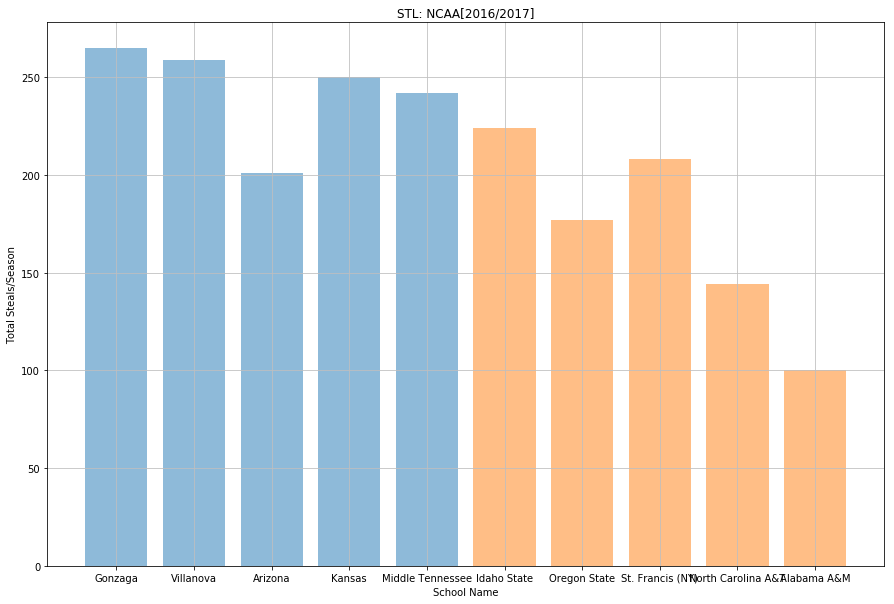

In [34]:
#Steals 
Top_NCAA_1617_STL_Bar = plt.bar(NCAA_top5_1617['School'],NCAA_top5_1617['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2016/2017]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


Bot_NCAA_1617_STL_Bar = plt.bar(NCAA_bot5_1617['School'],NCAA_bot5_1617['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2016/2017]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


# Save the Figure
plt.savefig('NCAA_2016_STL.png')

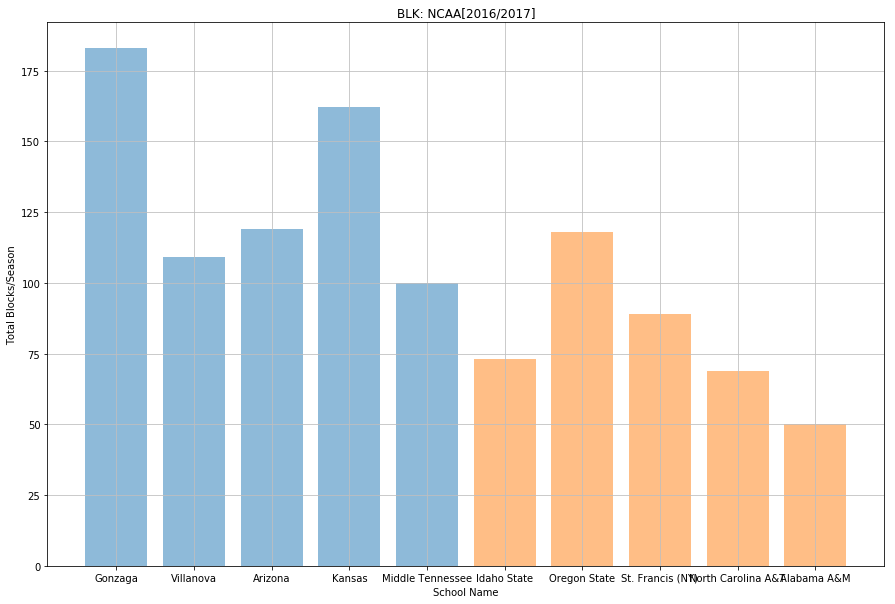

In [35]:
#Blocks 
Top_NCAA_1617_BLK_Bar = plt.bar(NCAA_top5_1617['School'],NCAA_top5_1617['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2016/2017]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1617_BLK_Bar = plt.bar(NCAA_bot5_1617['School'],NCAA_bot5_1617['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2016/2017]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


plt.savefig('NCAA_2016_BLK.png')

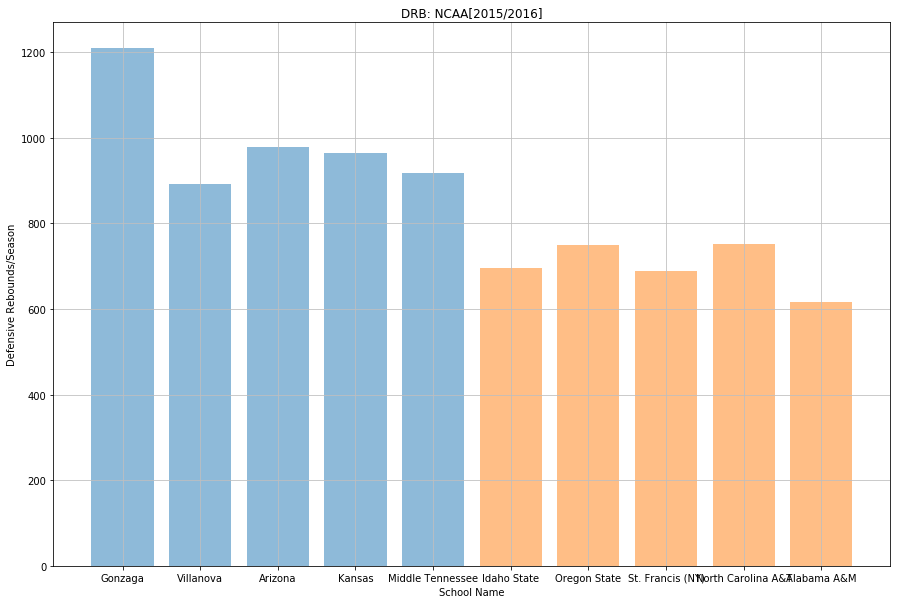

In [36]:
#Defensive Rebounds 
Top_NCAA_1617_DRB_Bar = plt.bar(NCAA_top5_1617['School'],NCAA_top5_1617['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2016/2017]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1617_DRB_Bar = plt.bar(NCAA_bot5_1617['School'],NCAA_bot5_1617['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2015/2016]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NCAA_2016_DRB.png')

# NCAA 2017-18

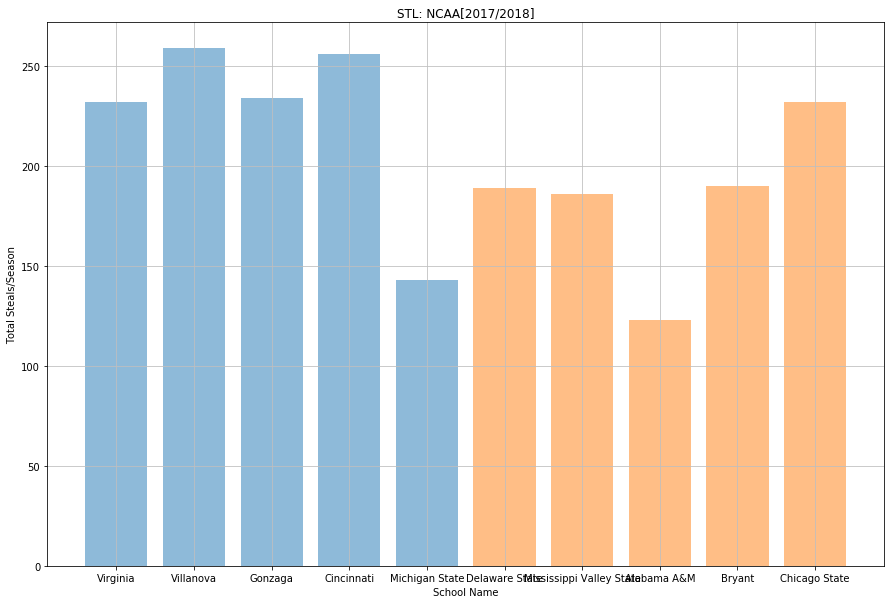

In [37]:
#Steals 
Top_NCAA_1718_STL_Bar = plt.bar(NCAA_top5_1718['School'],NCAA_top5_1718['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2017/2018]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


Bot_NCAA_1718_STL_Bar = plt.bar(NCAA_bot5_1718['School'],NCAA_bot5_1718['STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NCAA[2017/2018]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


# Save the Figure
plt.savefig('NCAA_2017_STL.png')

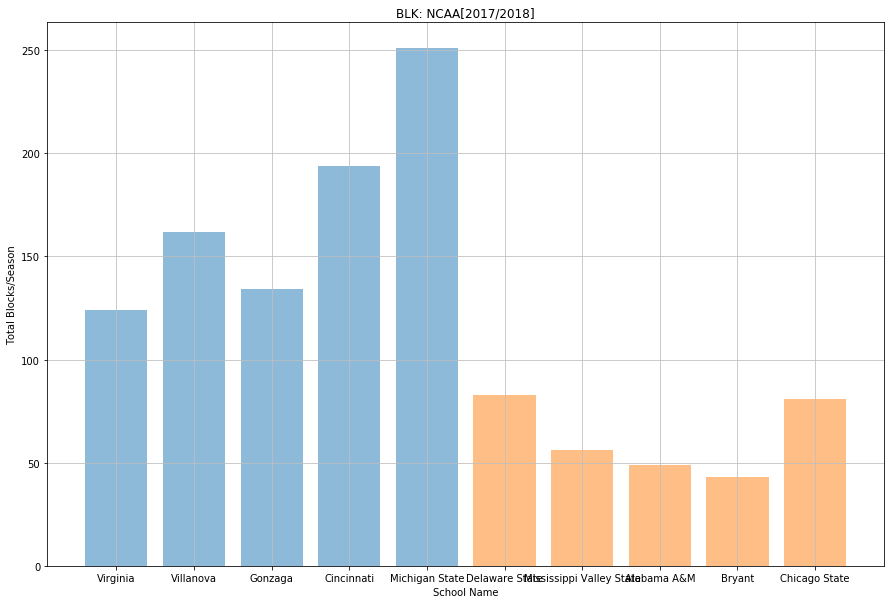

In [38]:
#Blocks 
Top_NCAA_1718_BLK_Bar = plt.bar(NCAA_top5_1718['School'],NCAA_top5_1718['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2017/2018]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1718_BLK_Bar = plt.bar(NCAA_bot5_1718['School'],NCAA_bot5_1718['BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NCAA[2017/2018]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


plt.savefig('NCAA_2017_BLK.png')

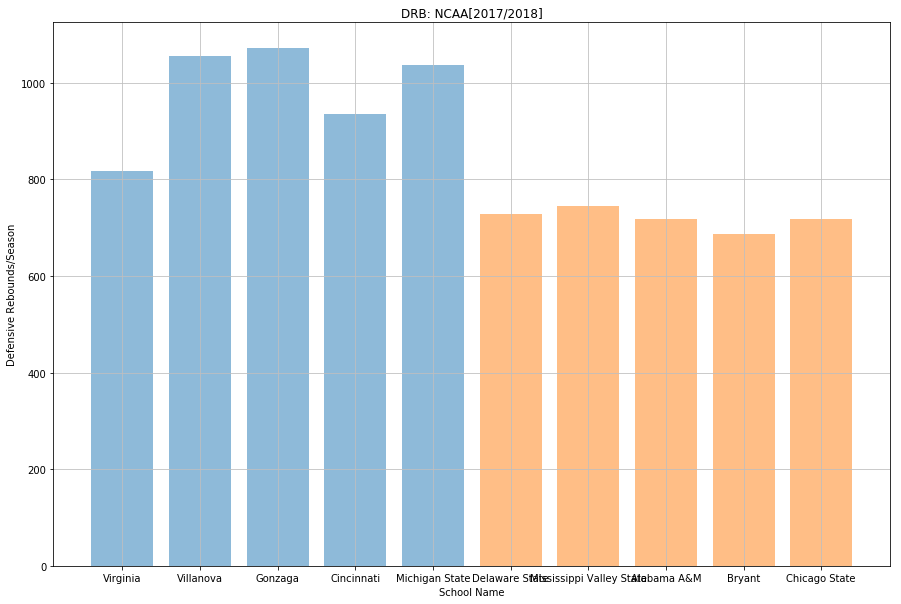

In [39]:
#Defensive Rebounds 
Top_NCAA_1718_DRB_Bar = plt.bar(NCAA_top5_1718['School'],NCAA_top5_1718['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2017/2018]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

Bot_NCAA_1718_DRB_Bar = plt.bar(NCAA_bot5_1718['School'],NCAA_bot5_1718['DRB'],align='center', alpha=0.5)
plt.ylabel('Defensive Rebounds/Season')
plt.title('DRB: NCAA[2017/2018]')
plt.xlabel('School Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NCAA_2017_DRB.png')

# NBA 2013-14

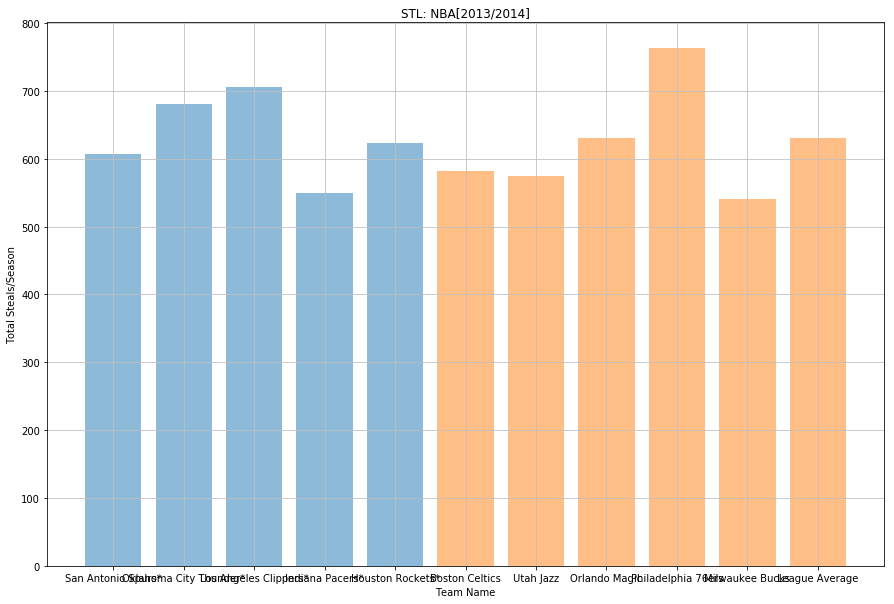

In [40]:
#Steals 
Top_NBA_1314_STL_Bar = plt.bar(NBA_top5_1314['Team'],NBA_top5_1314['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2013/2014]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1314_STL_Bar = plt.bar(NBA_bot5_1314['Team'],NBA_bot5_1314['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2013/2014]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2013_STL.png')

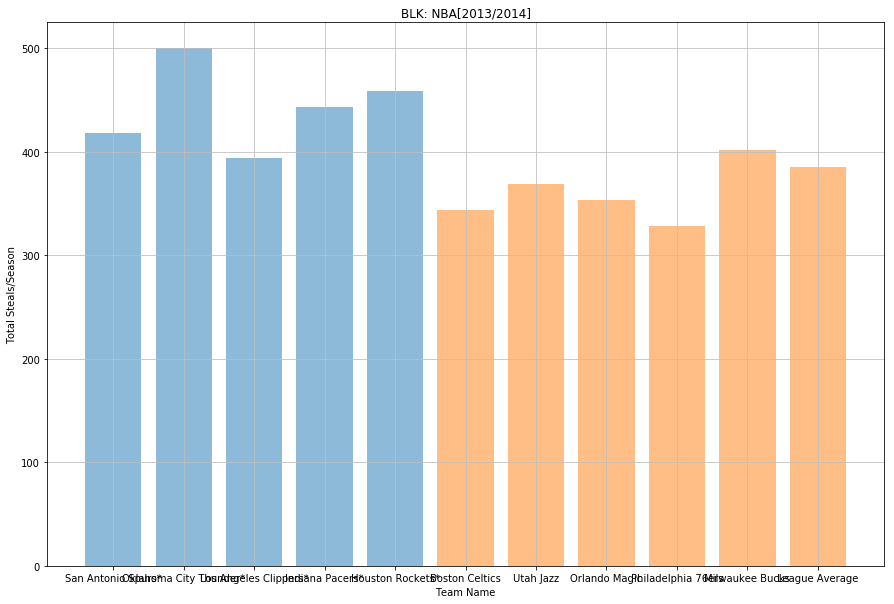

In [41]:
#Blocks
Top_NBA_1314_BLK_Bar = plt.bar(NBA_top5_1314['Team'],NBA_top5_1314['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NBA[2013/2014]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1314_BLK_Bar = plt.bar(NBA_bot5_1314['Team'],NBA_bot5_1314['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('BLK: NBA[2013/2014]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2013_BLK.png')

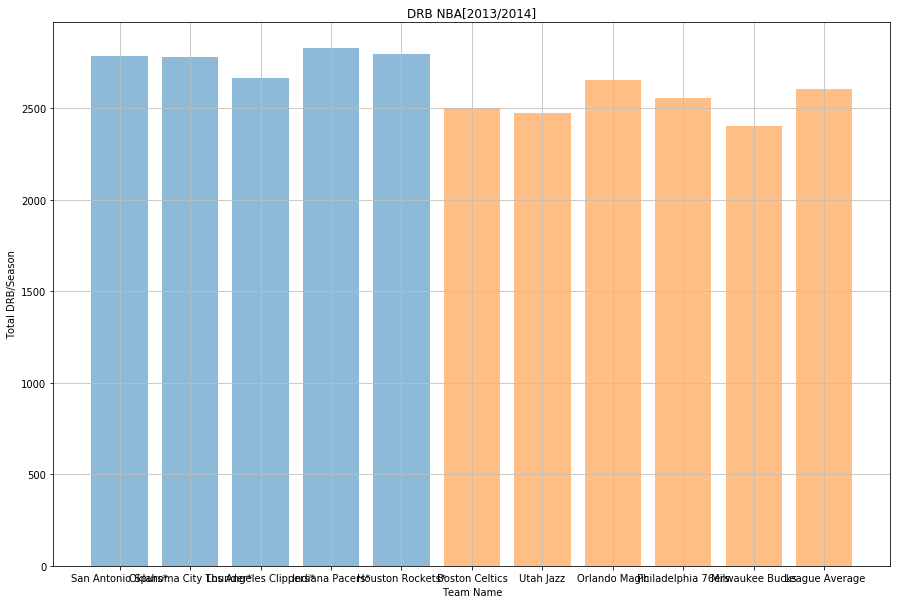

In [42]:
# Defensive Rebounds
Top_NBA_1314_DRB_Bar = plt.bar(NBA_top5_1314['Team'],NBA_top5_1314['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB: NBA[2013/2014]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1314_BLK_Bar = plt.bar(NBA_bot5_1314['Team'],NBA_bot5_1314['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB NBA[2013/2014]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2013_DRB.png')

# NBA 2014-15

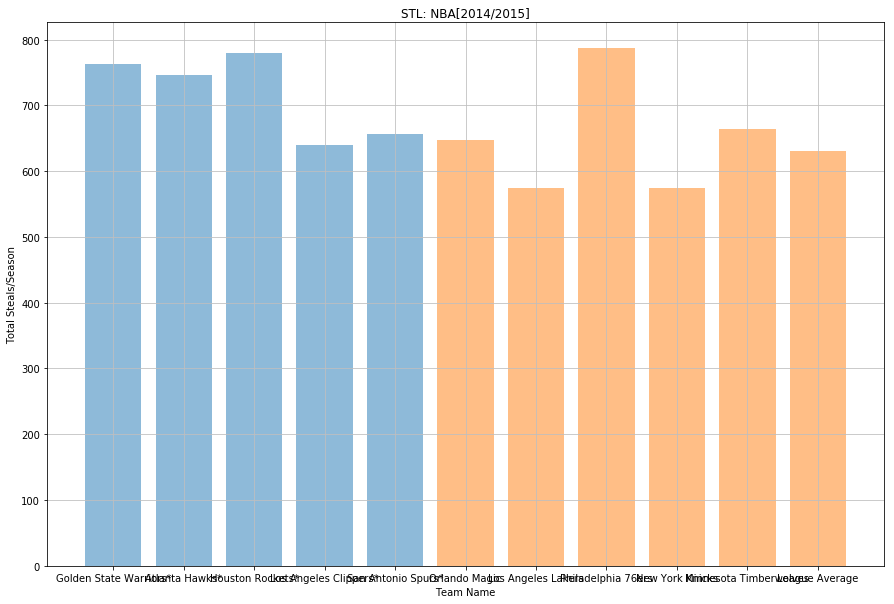

In [43]:
#Steals 
Top_NBA_1415_STL_Bar = plt.bar(NBA_top5_1415['Team'],NBA_top5_1415['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2014/2015]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1415_STL_Bar = plt.bar(NBA_bot5_1415['Team'],NBA_bot5_1415['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2014/2015]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2014_STL.png')

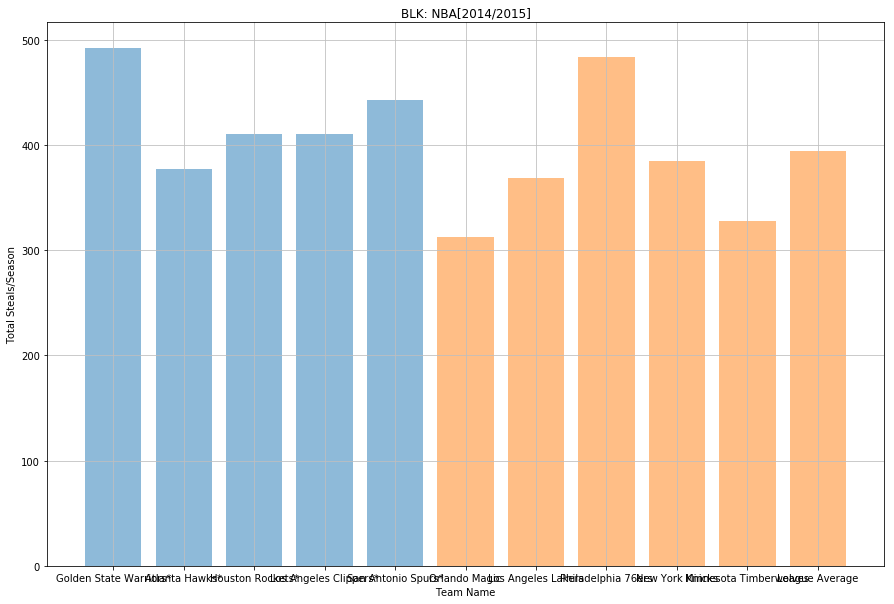

In [44]:
#Blocks
Top_NBA_1415_BLK_Bar = plt.bar(NBA_top5_1415['Team'],NBA_top5_1415['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NBA[2014/2015]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1415_BLK_Bar = plt.bar(NBA_bot5_1415['Team'],NBA_bot5_1415['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('BLK: NBA[2014/2015]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2014_BLK.png')

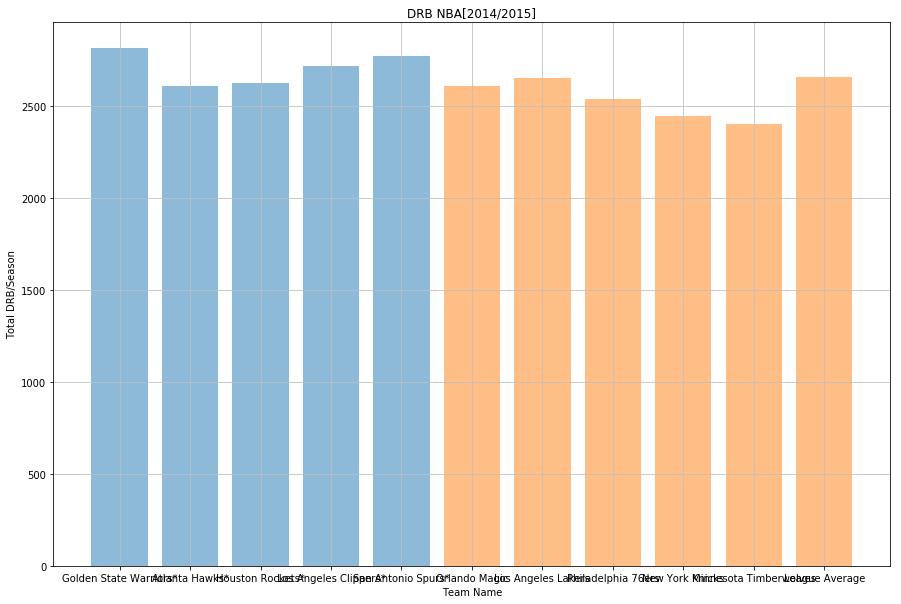

In [45]:
# Defensive Rebounds
Top_NBA_1415_DRB_Bar = plt.bar(NBA_top5_1415['Team'],NBA_top5_1415['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB: NBA[2014/2015]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure

Bot_NBA_1415_BLK_Bar = plt.bar(NBA_bot5_1415['Team'],NBA_bot5_1415['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB NBA[2014/2015]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2014_DRB.png')

# NBA 2015-16

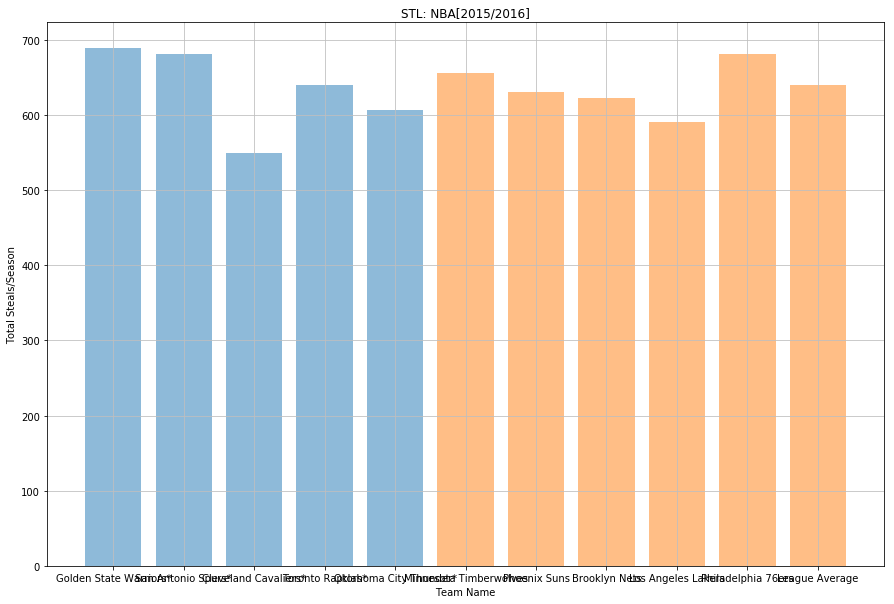

In [46]:
#Steals 
Top_NBA_1516_STL_Bar = plt.bar(NBA_top5_1516['Team'],NBA_top5_1516['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2015/2016]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1516_STL_Bar = plt.bar(NBA_bot5_1516['Team'],NBA_bot5_1516['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2015/2016]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2015_STL.png')

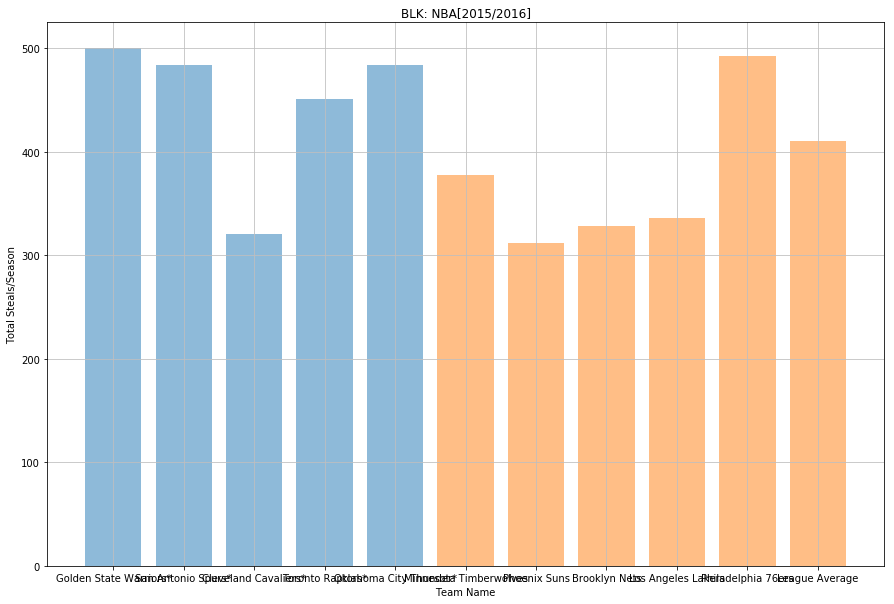

In [47]:
#Blocks
Top_NBA_1516_BLK_Bar = plt.bar(NBA_top5_1516['Team'],NBA_top5_1516['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NBA[2015/2016]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1516_BLK_Bar = plt.bar(NBA_bot5_1516['Team'],NBA_bot5_1516['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('BLK: NBA[2015/2016]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2015_BLK.png')

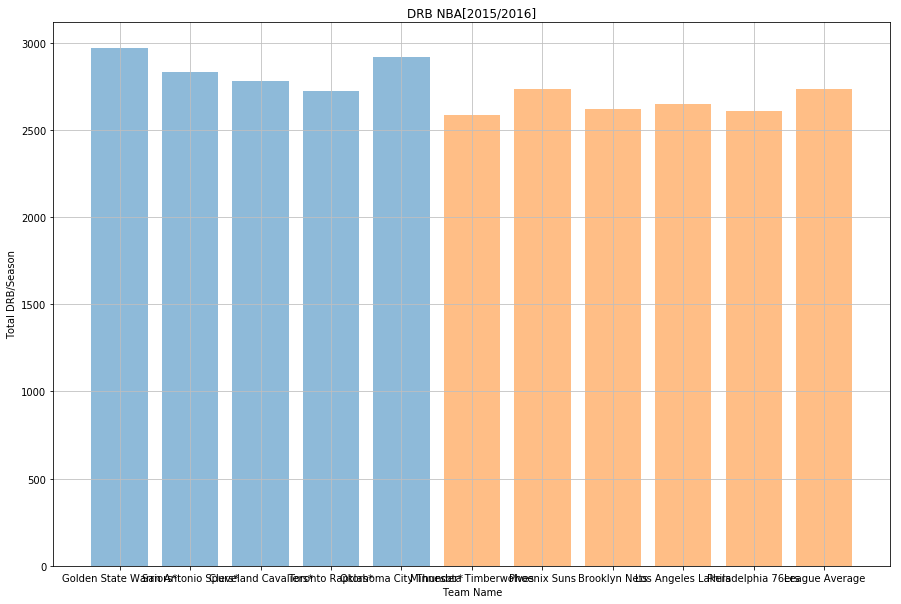

In [48]:
# Defensive Rebounds
Top_NBA_1516_DRB_Bar = plt.bar(NBA_top5_1516['Team'],NBA_top5_1516['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB: NBA[2015/2016]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure

Bot_NBA_1516_BLK_Bar = plt.bar(NBA_bot5_1516['Team'],NBA_bot5_1516['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB NBA[2015/2016]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2015_DRB.png')

# NBA 2016-17

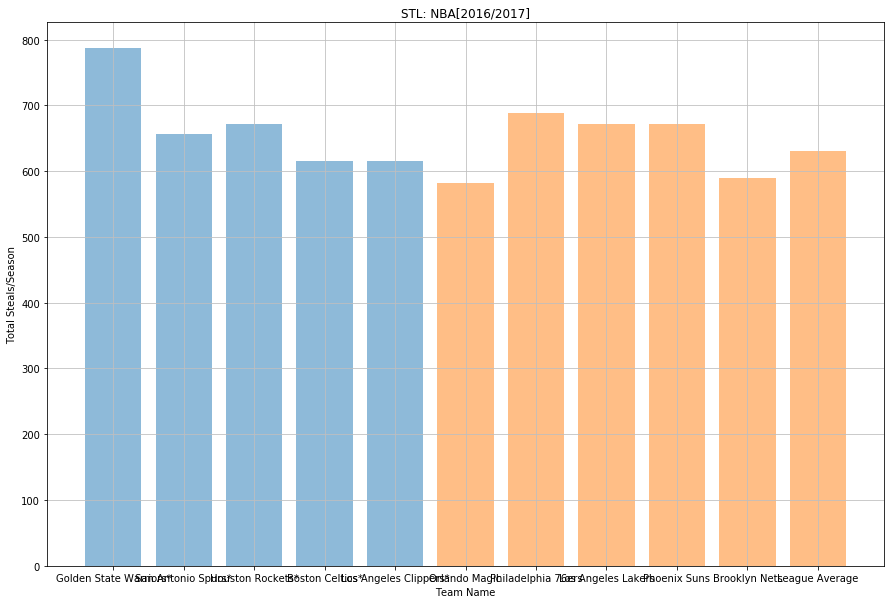

In [49]:
#Steals 
Top_NBA_1617_STL_Bar = plt.bar(NBA_top5_1617['Team'],NBA_top5_1617['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2016/2017]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1617_STL_Bar = plt.bar(NBA_bot5_1617['Team'],NBA_bot5_1617['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2016/2017]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2016_STL.png')

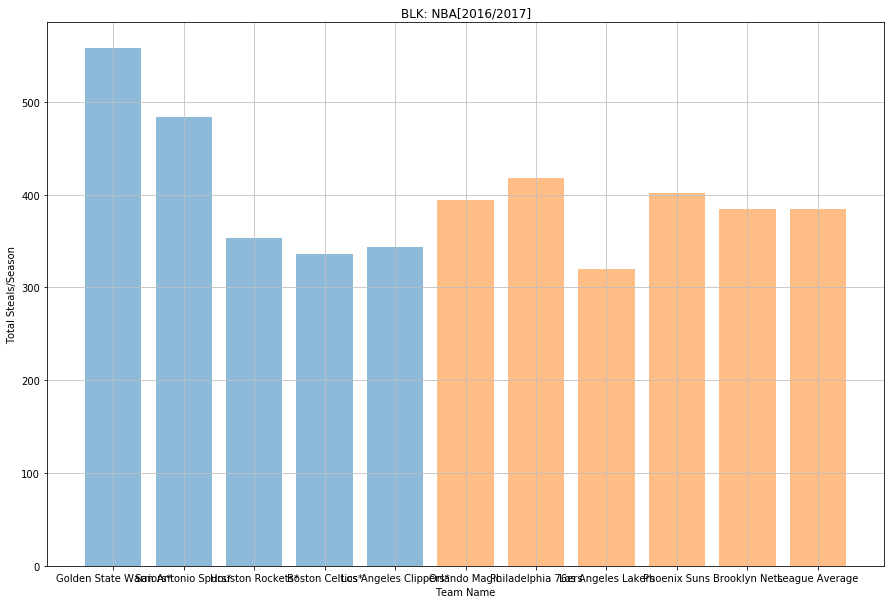

In [50]:
#Blocks
Top_NBA_1617_BLK_Bar = plt.bar(NBA_top5_1617['Team'],NBA_top5_1617['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NBA[2016/2017]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1617_BLK_Bar = plt.bar(NBA_bot5_1617['Team'],NBA_bot5_1617['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('BLK: NBA[2016/2017]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2016_BLK.png')

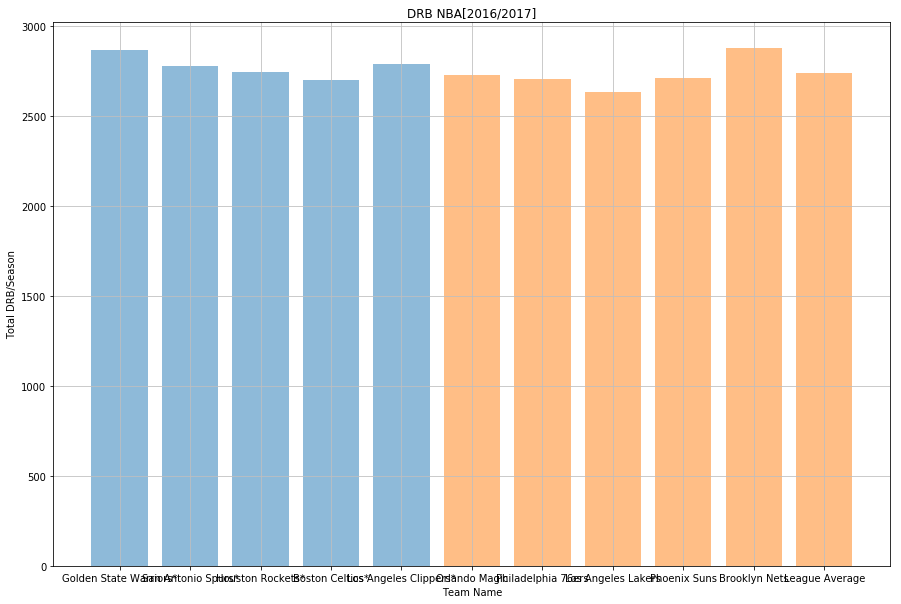

In [51]:
# Defensive Rebounds
Top_NBA_1617_DRB_Bar = plt.bar(NBA_top5_1617['Team'],NBA_top5_1617['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB: NBA[2016/2017]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure

Bot_NBA_1617_BLK_Bar = plt.bar(NBA_bot5_1617['Team'],NBA_bot5_1617['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB NBA[2016/2017]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2016_DRB.png')

# NBA 2017-18

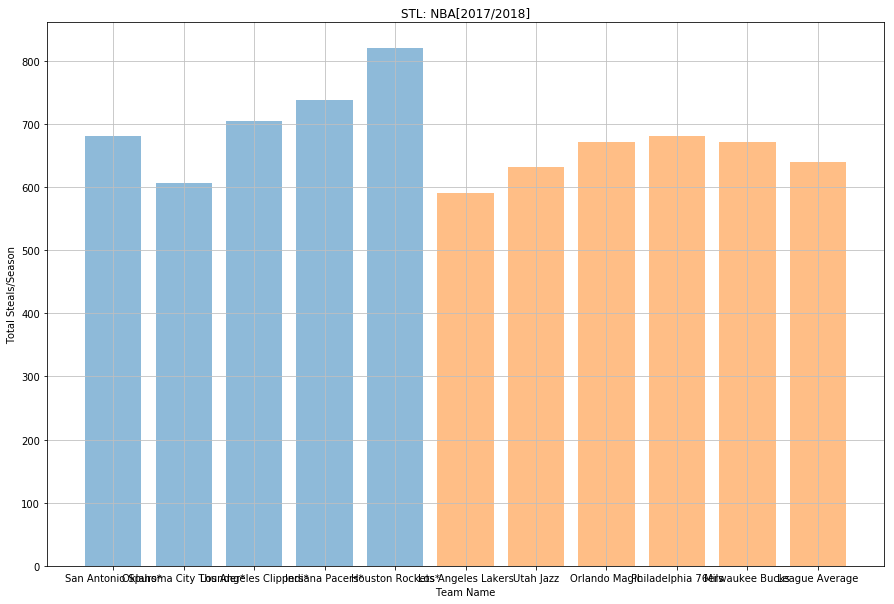

In [52]:
#Steals 
Top_NBA_1718_STL_Bar = plt.bar(NBA_top5_1718['Team'],NBA_top5_1718['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2017/2018]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure


Bot_NBA_1718_STL_Bar = plt.bar(NBA_bot5_1718['Team'],NBA_bot5_1718['Tot_STL'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('STL: NBA[2017/2018]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2017_STL.png')

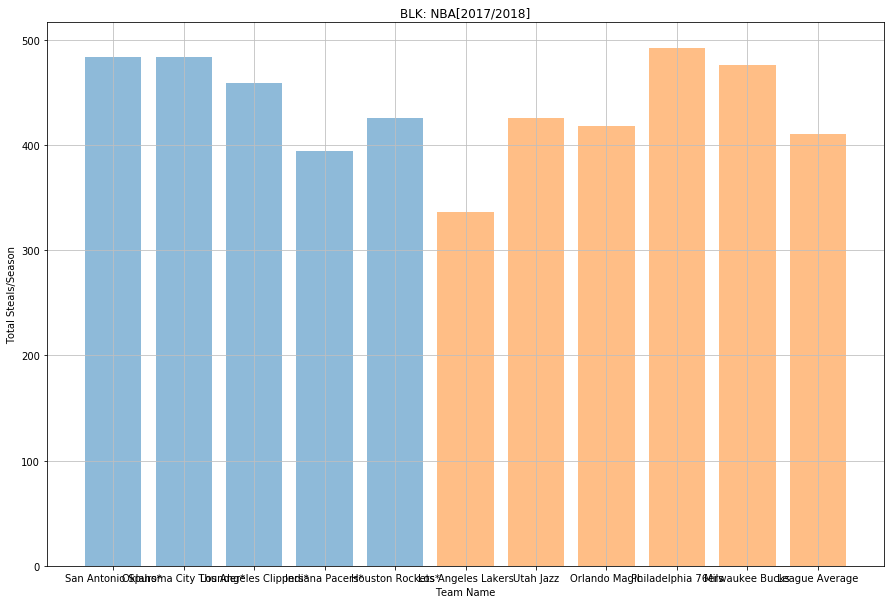

In [53]:
#Blocks
Top_NBA_1718_BLK_Bar = plt.bar(NBA_top5_1718['Team'],NBA_top5_1718['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Blocks/Season')
plt.title('BLK: NBA[2017/2018]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


Bot_NBA_1718_BLK_Bar = plt.bar(NBA_bot5_1718['Team'],NBA_bot5_1718['Tot_BLK'],align='center', alpha=0.5)
plt.ylabel('Total Steals/Season')
plt.title('BLK: NBA[2017/2018]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)


# Save Figure
plt.savefig('NBA_2017_BLK.png')

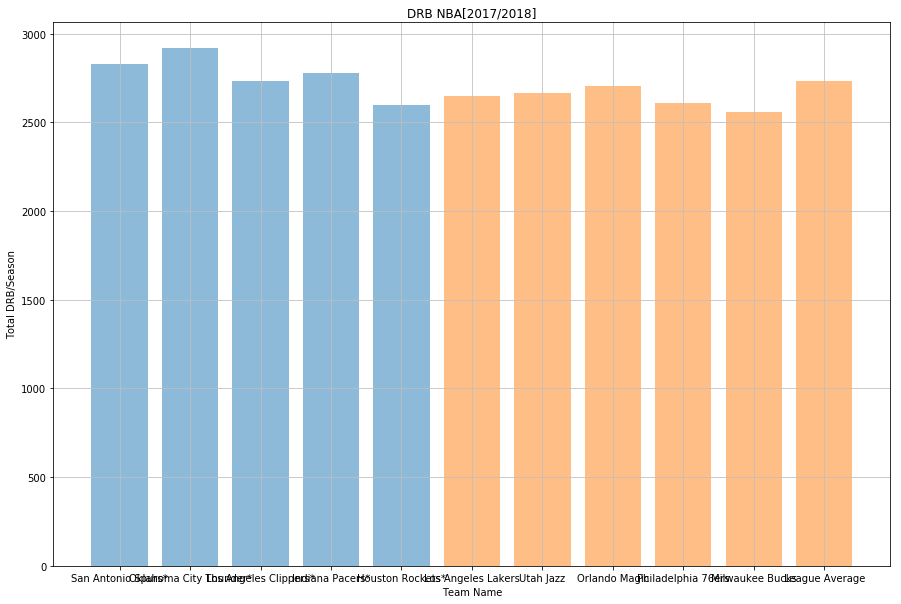

In [54]:
# Defensive Rebounds
Top_NBA_1718_DRB_Bar = plt.bar(NBA_top5_1718['Team'],NBA_top5_1718['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB: NBA[2016/2017]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

# Save the Figure

Bot_NBA_1718_BLK_Bar = plt.bar(NBA_bot5_1718['Team'],NBA_bot5_1718['Tot_DRB'],align='center', alpha=0.5)
plt.ylabel('Total DRB/Season')
plt.title('DRB NBA[2017/2018]')
plt.xlabel('Team Name')
plt.grid(color="0.75", linestyle="-") 
plt.rcParams['figure.figsize'] = (15,10)

plt.savefig('NBA_2017_DRB.png')